<h2>Import Libraries</h2>

In [10]:
import pandas as pd #data preprocessing
import numpy as np
import itertools
import string
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics 
import matplotlib.pyplot as plt
%matplotlib inline
#To show all the rows of pandas datafram
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

<h2>Load the Data</h2>

In [14]:
insurance_df = pd.read_excel(r'C:\Users\wits-students\Documents\GitHub\Integrated-Project\datasets\insurance_claims_raw.xlsx')
insurance_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,NaN
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,NaN
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,NaN
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,NaN


<h2>EDA on Insurance Claims Data</h2>

<h2>Data Cleaning</h2>

In [15]:
insurance_df = insurance_df.drop(columns =['_c39'])
insurance_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,2,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,0,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,3,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,2,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,1,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N


In [19]:
insurance_df.shape

(1000, 39)

In [20]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          998 non-null    float64       
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            998 non-null    float64       
 7   policy_annual_premium        997 non-null    float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      999 non-null   

In [21]:
insurance_df.isnull().sum()

months_as_customer             0
age                            2
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              2
policy_annual_premium          3
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        1
insured_occupation             0
insured_hobbies                2
insured_relationship           0
capital-gains                  2
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          2
incident_state                 2
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [23]:
#remove missing values
insurance_df.dropna(inplace = True)

In [24]:
insurance_df.isna().sum().sum()

0

In [25]:
insurance_df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,2,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,0,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,3,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N
5,256,39.0,104594,2006-10-12,OH,250/500,1000.0,1351.10,0,478456,...,2,NO,64100.0,6410.0,6410.0,51280,Saab,95,2003,Y
7,165,37.0,429027,1990-02-03,IL,100/300,1000.0,1137.03,0,603195,...,2,YES,51590.0,9380.0,9380.0,32830,Audi,A5,2015,N
8,27,33.0,485665,1997-02-05,IL,100/300,500.0,1442.99,0,601734,...,1,YES,27700.0,2770.0,2770.0,22160,Toyota,Camry,2012,N
9,212,42.0,636550,2011-07-25,IL,100/300,500.0,1315.68,0,600983,...,1,?,42300.0,4700.0,4700.0,32900,Saab,92x,1996,N
10,235,42.0,543610,2002-05-26,OH,100/300,500.0,1253.12,4000000,462283,...,2,?,87010.0,7910.0,15820.0,63280,Ford,F150,2002,N
12,60,23.0,842643,1997-11-20,OH,500/1000,500.0,1215.36,3000000,432220,...,0,NO,56520.0,4710.0,9420.0,42390,Saab,95,2000,N
13,121,34.0,626808,2012-10-26,OH,100/300,1000.0,936.61,0,464652,...,1,NO,7280.0,1120.0,1120.0,5040,Toyota,Highlander,2010,N


In [26]:
insurance_df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,979.000000,979.000000,979.000000,979.000000,979.000000,9.790000e+02,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000
mean,203.764045,38.902962,549621.884576,1132.277835,1256.542176,1.092952e+06,500806.609806,25247.088866,-26649.438202,11.593463,1.832482,0.996936,1.488253,52600.633299,7388.815117,7373.432074,37838.386108,2005.072523
std,114.885087,9.130937,256712.223487,609.753731,244.700121,2.295310e+06,71440.903757,27841.852153,28078.070521,6.941193,1.018503,0.820862,1.109825,26378.013188,4849.702247,4822.740554,18892.282739,6.030076
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.500000,32.000000,339342.000000,500.000000,1090.175000,0.000000e+00,448534.500000,0.000000,-51300.000000,6.000000,1.000000,0.000000,1.000000,41635.000000,4260.000000,4420.000000,30200.000000,2000.000000
50%,198.000000,38.000000,536052.000000,1000.000000,1257.360000,0.000000e+00,466390.000000,0.000000,-22300.000000,12.000000,1.000000,1.000000,1.000000,57860.000000,6770.000000,6740.000000,41930.000000,2005.000000
75%,276.500000,44.000000,764572.000000,2000.000000,1415.210000,0.000000e+00,602892.000000,51050.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70400.000000,11200.000000,10840.000000,50845.000000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,112320.000000,21330.000000,23670.000000,77760.000000,2015.000000


In [27]:
insurance_df.age.describe()

count    979.000000
mean      38.902962
std        9.130937
min       19.000000
25%       32.000000
50%       38.000000
75%       44.000000
max       64.000000
Name: age, dtype: float64

In [28]:
insurance_df.skew()

months_as_customer             0.366635
age                            0.475110
policy_number                  0.024233
policy_deductable              0.490643
policy_annual_premium          0.000809
umbrella_limit                 1.825830
insured_zip                    0.830451
capital-gains                  0.470669
capital-loss                  -0.402235
incident_hour_of_the_day      -0.027156
number_of_vehicles_involved    0.520231
bodily_injuries                0.005665
witnesses                      0.020670
total_claim_amount            -0.595797
injury_claim                   0.249723
property_claim                 0.386510
vehicle_claim                 -0.618497
auto_year                     -0.040310
dtype: float64

In [29]:
insurance_df.kurtosis()

months_as_customer            -0.486998
age                           -0.279413
policy_number                 -1.129391
policy_deductable             -1.356871
policy_annual_premium          0.084919
umbrella_limit                 1.867360
insured_zip                   -1.165104
capital-gains                 -1.275866
capital-loss                  -1.300377
incident_hour_of_the_day      -1.191882
number_of_vehicles_involved   -1.477769
bodily_injuries               -1.515983
witnesses                     -1.340041
total_claim_amount            -0.473108
injury_claim                  -0.796037
property_claim                -0.358748
vehicle_claim                 -0.464060
auto_year                     -1.176794
dtype: float64

<h2>Data Visualisation</h2>

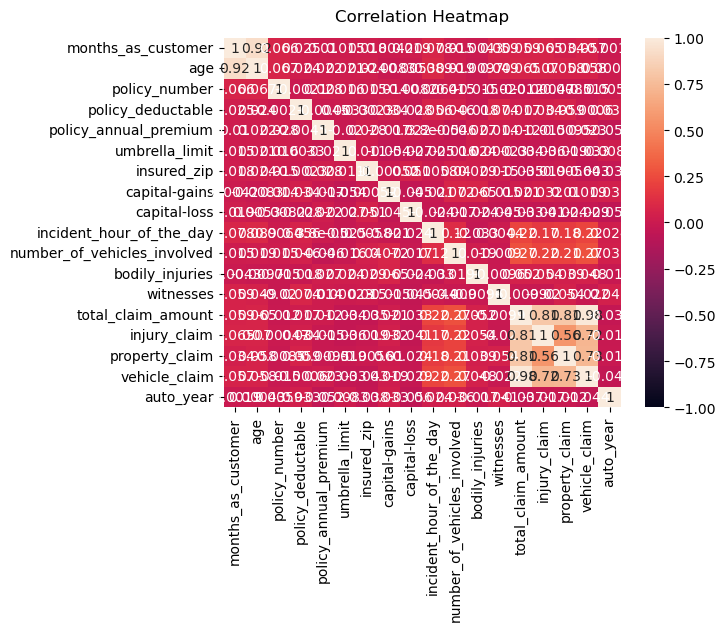

In [32]:
heatmap = sns.heatmap(insurance_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
<h2>Data Visualisation</h2>

In [ ]:
import matplotlib.pyplto